# Moosic Project

# 10 songs


## 1. Preparation (import data, libraries)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# df = pd.read_csv('df_audio_features_10.csv') #index_col='student', nrows=16
df = pd.read_csv('df_audio_features_10.csv',index_col=["song_name", "artist"])
df

In [ ]:
#df.drop(['favorite_color'], axis=1, inplace=True)

## 2. Scale / normalize / equate / transform

Three different ways to normalize (where the distribution stayed the same).
Only the values of the x-axis changed from - to + or from 0 to 1 and there was one other option which had something to do with "robust"
1. Min-Max normalize from 0 to 1
2. scale mean = 0, Standard deviation = 1
3. Robust scaling (based on the medium instead of the mean)

In [ ]:
df.drop(["html", "id", "time_signature"], axis=1, inplace=True)
df

In [ ]:
df.drop(["duration_ms", "mode"], axis=1, inplace=True)
df

In [ ]:
# df = df.set_index("song_name")
# df

In [ ]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler

# 2. initialize the transformer 
my_min_max = MinMaxScaler()

#3. Fit the transformer to the data
my_min_max.fit(df)

#4. use the transfomer to transform the data
scaled_features = my_min_max.transform(df)

#5. reconvert the transformed dta back to a Data Frame
scaled_features_df = pd.DataFrame(scaled_features, 
                                  index=df.index, 
                                  columns=df.columns)

scaled_features_df

Two different ways to transform (where the distribution is changed and approximated to normal distribution)
1. Quantile Transformer
2. Power Transformer

## 3. Feed the model into an algorithm (K-Means)

As a result of the algorithm we will get clusters (he said something about the seeds and where they are allocated). 

In [ ]:
#1. import the model
from sklearn.cluster import KMeans

#2 initialize the model
my_kmeans = KMeans(n_clusters = 5, random_state = 123)

#3. fit the model to the data
my_kmeans.fit(scaled_features_df) #pass your scaled data here

#4.1 obtain the cluster output (no need to use this one)
#clusters = my_kmeans.predict(scaled_features_df) # pass your scaled data here

#4.2 alternative (without predict but with labels_) 
# (an attribute has always a _ at the end: labels_ 
clusters = my_kmeans.labels_

#5. add the result to the dataframe
scaled_features_df["cluster"] = clusters

In [ ]:
# here is the result sorted by cluster:

scaled_features_df.sort_values(["cluster"])

Conclusion: Hey, this looks exactly like the output we were expecting. YAY! As if this was plannend. Thank you very much. It's a time for a break :)

Only later we will find out why exactly did it work the way it worked. It's a mystery :) 

In [ ]:
# 0 - Bossa Nova
# 1 - Rock'n roll
# 2 - Classic
# 3 - Techno
# 4 - Rap

cluster_names = {
    "cluster": [0, 1, 2, 3, 4],
    "cluster_name": ["Bossa Nova", "Rock", "Classic", "Techno", "Rap"]
}

cluster_names = pd.DataFrame(cluster_names)

In [ ]:
scaled_features_named_df = scaled_features_df.merge(cluster_names, on="cluster")

In [ ]:
scaled_features_named_df

## 4. Looking at the clusters and see if they make sense. Depending on conclusion we will have to go back to step 2. 

i.e. take out the outliers, or see whatever makes sense to us and then improve the input data and then run the model again. 

In [ ]:
scaled_features_df.groupby(by="cluster").mean()

In [ ]:
scaled_features_named_df.groupby(by="cluster_name").mean()
# 0 - Bossa Nova
# 1 - Rock
# 2 - Classic
# 3 - Techno
# 4 - Rap

In [ ]:
centroids = my_kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids = centroids.reset_index()
centroids = centroids.rename(columns = {"index": "cluster"})
centroids

In [ ]:
centroids = centroids.merge(cluster_names, on = "cluster")

In [ ]:
centroids = centroids.set_index("cluster_name")

In [ ]:
centroids.drop(["cluster"], axis=1, inplace=True)

In [ ]:
centroids

In [ ]:
from sklearn.metrics import pairwise_distances
centroid_distances = pairwise_distances(centroids)

sns.heatmap(centroid_distances, annot=True)
# 0 - Bossa Nova
# 1 - Rock
# 2 - Classic
# 3 - Techno
# 4 - Rap

# 1000 Songs

In [ ]:
df_1 = pd.read_csv('df_audio_features_1000.csv',index_col=["name", "artist"])
df_1

##  Scaling

In [ ]:
df_1.drop(["html", "id", "time_signature"], axis=1, inplace=True)
df_1

In [ ]:
df_1.drop(["duration_ms", "mode", "key", "loudness", "speechiness", "liveness", "type"], axis=1, inplace=True)
df_1

In [ ]:
# 2. initialize the transformer 
my_min_max = MinMaxScaler()

#3. Fit the transformer to the data
my_min_max.fit(df_1)

#4. use the transfomer to transform the data
scaled_features_1 = my_min_max.transform(df_1)

#5. reconvert the transformed dta back to a Data Frame
scaled_features_df_1 = pd.DataFrame(scaled_features_1, 
                                  index=df_1.index, 
                                  columns=df_1.columns)

scaled_features_df_1

## Feed model to K-Means

In [1]:
#1. import the model
# from sklearn.cluster import KMeans

#2 initialize the model
my_kmeans_1 = KMeans(n_clusters = 20, random_state = 123)

#3. fit the model to the data
my_kmeans_1.fit(scaled_features_df_1) #pass your scaled data here

#4.1 obtain the cluster output (no need to use this one)
#clusters = my_kmeans.predict(scaled_features_df) # pass your scaled data here

#4.2 alternative (without predict but with labels_) 
# (an attribute has always a _ at the end: labels_ 
clusters_1 = my_kmeans_1.labels_

#5. add the result to the dataframe
scaled_features_df_1["cluster"] = clusters_1

NameError: ignored

In [ ]:
scaled_features_df_1.sort_values(["cluster"])

,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,
One For Majid - Live,Keith Jarrett,0.537815,0.323279,0.664658,0.030355,0.485187,0.296130,0
My Groove Your Move - Rudy Van Gelder Edition,Hank Mobley,0.580938,0.376493,0.783132,0.003706,0.668531,0.146216,0
It's Only A Paper Moon,Ella Fitzgerald,0.775542,0.103395,0.947791,0.000000,0.528693,0.410888,0
Rags To Riches,Tony Bennett,0.374171,0.459828,0.873494,0.000006,0.545266,0.180215,0
I'll Remember April - Instrumental,Chet Baker,0.415082,0.500994,0.771084,0.108629,0.687176,0.461200,0
...,...,...,...,...,...,...,...,...
Cool Down The Pace,Gregory Isaacs,0.896064,0.267053,0.089054,0.022030,0.941993,0.170351,19
"Signed, Sealed, Delivered (I'm Yours)",Stevie Wonder,0.674923,0.621478,0.051604,0.000000,0.815620,0.377573,19
Be-Bop-A-Lula,Gene Vincent & His Blue Caps,0.605263,0.563244,0.422689,0.000000,0.850839,0.497682,19


## Making sense of clusters

In [ ]:
scaled_features_df_1.groupby(by="cluster").mean()

,danceability,energy,acousticness,instrumentalness,valence,tempo
cluster,,,,,,
0,0.568916,0.332351,0.814735,0.043924,0.587338,0.388789
1,0.566228,0.831965,0.060796,0.021774,0.573711,0.423714
2,0.148051,0.113587,0.917257,0.847770,0.058986,0.180800
3,0.783215,0.745766,0.367560,0.003407,0.761160,0.317980
4,0.677598,0.431489,0.457312,0.031856,0.527423,0.360157
5,0.492291,0.257063,0.874890,0.842640,0.376555,0.411625
6,0.664517,0.606758,0.693739,0.032056,0.851172,0.331586
7,0.466428,0.803899,0.050984,0.020797,0.304759,0.763668
8,0.207866,0.144505,0.938281,0.062313,0.103689,0.233093


In [ ]:
centroids_1 = my_kmeans_1.cluster_centers_
centroids_1 = pd.DataFrame(centroids_1)
centroids_1 = centroids_1.reset_index()
centroids_1 = centroids_1.rename(columns = {"index": "cluster"})
centroids_1

,cluster,0,1,2,3,4,5
0,0,0.568916,0.332351,0.814735,0.043924,0.587338,0.388789
1,1,0.566228,0.831965,0.060796,0.021774,0.573711,0.423714
2,2,0.148051,0.113587,0.917257,0.847770,0.058986,0.180800
3,3,0.783215,0.745766,0.367560,0.003407,0.761160,0.317980
4,4,0.677598,0.431489,0.457312,0.031856,0.527423,0.360157
5,5,0.492291,0.257063,0.874890,0.842640,0.376555,0.411625
6,6,0.664517,0.606758,0.693739,0.032056,0.851172,0.331586
7,7,0.466428,0.803899,0.050984,0.020797,0.304759,0.763668
8,8,0.207866,0.144505,0.938281,0.062313,0.103689,0.233093
9,9,0.560464,0.811954,0.048241,0.804388,0.524235,0.659273


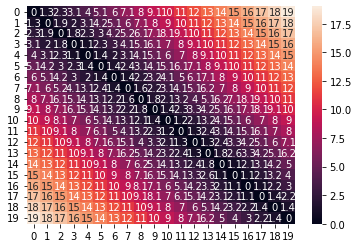

In [ ]:
centroid_distances_1 = pairwise_distances(centroids_1)

sns.heatmap(centroid_distances_1, annot=True)